In [10]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

[array([3.27098258, 4.73684323, 5.20463488, 6.44006815])]
[array([[-1.        , -1.72980299, -9.30458057, -1.86323428],
       [-1.        , -5.67188884,  4.52280775,  0.74586304],
       [-1.        , -4.41339382, -4.31533383,  4.05965964],
       [-1.        , -1.14892004,  9.74712403,  1.59789388]])]


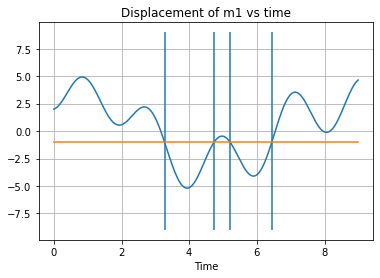

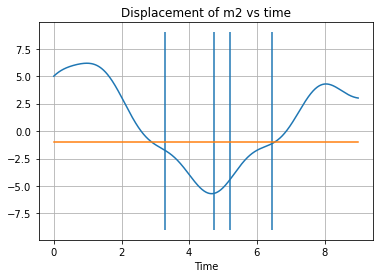

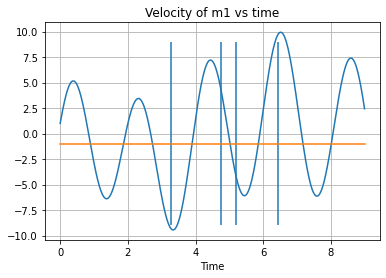

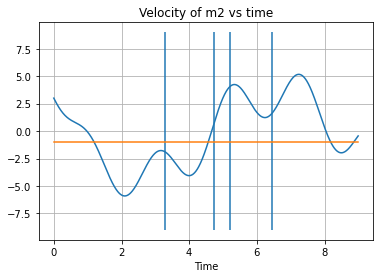

In [11]:
def hit_spring(t, y):
    return y[0] + 1

# hit_spring.terminal = True

def F(t, y):
##########################################################################################################################################################################################
    m1 = 3
    m2 = 5

    k1 = 7
    k2 = 9

    c1 = 1
    c2 = 2

    f1 = 40*np.cos(3*t)
    f2 = 0
##########################################################################################################################################################################################

    M = np.array([
        [m1, 0],
        [0, m2]
    ])

    C = np.array([
        [c1 + c2, -c2],
        [-c2, c2]
    ])

    K = np.array([
        [k1 + k2, -k2],
        [-k2, k2]
    ])

    KK = np.array([
        [2*k1 + k2, -k2],
        [-k2, k2]
    ])

    A = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), K), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])

    AA = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), KK), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])


    B = np.vstack([
        np.zeros((2, 2)), 
        np.linalg.inv(M)
    ])

    F = np.array([
        [f1],
        [f2]
    ])

    yvec = np.array([[y[i] for i in range(4)]]).T

    ydot1 = np.matmul(A, yvec) + np.matmul(B, F)    # k1 = 7 
    ydot2 = np.matmul(AA, yvec) + np.matmul(B, F)   # k1 = 14

    return ydot1

####################################################################################################################################################################################
start_time = 0
end_time = 9
delta_t = 0.01

initial_position_m_1 = 2
initial_velocity_m_1 = 1

initial_position_m_2 = 5
initial_velocity_m_2 = 3
####################################################################################################################################################################################

TE = np.arange(start_time, end_time, delta_t)

time_interval = np.array([start_time, end_time])

initial_conditions = np.array([
    initial_position_m_1, 
    initial_position_m_2, 
    initial_velocity_m_1, 
    initial_velocity_m_2
])

sol = solve_ivp(F, time_interval, initial_conditions, t_eval = TE, vectorized=True, method = 'RK45', events=hit_spring)


T = sol.t
Y = sol.y
TT = sol.t_events
YY = sol.y_events

print(TT)
print(YY)
dis_m_1 = sol.y[0]
dis_m_2 = sol.y[1]
vel_m_1 = sol.y[2]
vel_m_2 = sol.y[3]

plt.plot(T, dis_m_1)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)
plt.title("Displacement of m1 vs time")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.plot(T, dis_m_2)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)
plt.title("Displacement of m2 vs time")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.plot(T, vel_m_1)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)
plt.title("Velocity of m1 vs time")
plt.xlabel("Time")
plt.grid()
plt.show()

plt.plot(T, vel_m_2)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)
plt.title("Velocity of m2 vs time")
plt.xlabel("Time")
plt.grid()
plt.show()



0.0
0.0010645152559082649
0.0124417619937113
0.018662642990566948
0.0497670479748452
0.05529671997205021
0.062208809968556496
0.062208809968556496
0.1350721338545676
0.17150379579757313
0.3536621055126009
0.3860458050174947
0.426525429398612
0.426525429398612
0.5075447646402366
0.5480544322610489
0.7506027703651104
0.7866113638058324
0.831622105606735
0.831622105606735
0.4966985342291667
0.531785086644444
0.7072178487208308
0.7384058953121885
0.7773909535513855
0.7773909535513855
0.8470798010057828
0.8819242247329815
1.0561463433689746
1.087119164459818
1.125835190823372
1.125835190823372
1.1890289542805292
1.220625836009108
1.3786102446520014
1.4066963617440713
1.4418040081091588
1.4418040081091588
1.5296749453568377
1.5736104139806772
1.7932877570998744
1.8323415069877318
1.8811586943475533
1.8811586943475533
1.5156923979877566
1.5526365929270554
1.7373575676235498
1.7701968520140374
1.8112459575021473
1.8112459575021473
1.885134347380745
1.922078542320044
2.106799517016538
2.1396388

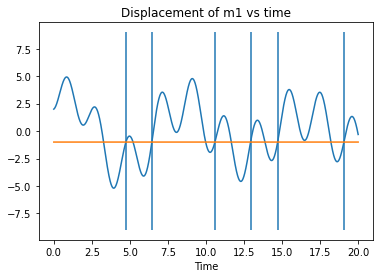

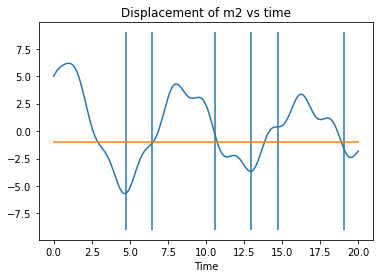

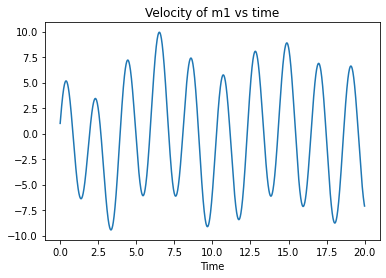

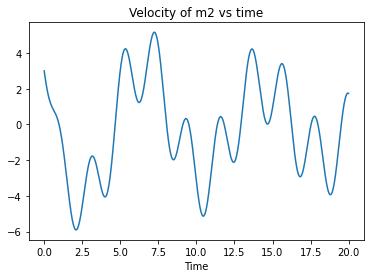

In [8]:


def hit_spring(t, y):
    return y[0] + 1

# hit_spring.terminal = True
hit_spring.direction = True

def F(t, y):
##########################################################################################################################################################################################
    m1 = 3
    m2 = 5

    k1 = 7
    k2 = 9

    c1 = 1
    c2 = 2

    f1 = 40*np.cos(3*t)
    f2 = 0
##########################################################################################################################################################################################

    M = np.array([
        [m1, 0],
        [0, m2]
    ])

    C = np.array([
        [c1 + c2, -c2],
        [-c2, c2]
    ])

    K = np.array([
        [k1 + k2, -k2],
        [-k2, k2]
    ])

    KK = np.array([
        [2*k1 + k2, -k2],
        [-k2, k2]
    ])

    A = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), K), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])

    AA = np.vstack([
        np.hstack([
            np.zeros((2, 2)), 
            np.eye(2, 2)
        ]), 
        np.hstack([
            -np.matmul(np.linalg.inv(M), KK), 
            -np.matmul(np.linalg.inv(M), C)
        ])
    ])


    B = np.vstack([
        np.zeros((2, 2)), 
        np.linalg.inv(M)
    ])

    F = np.array([
        [f1],
        [f2]
    ])

    yvec = np.array([[y[i] for i in range(4)]]).T

    ydot1 = np.matmul(A, yvec) + np.matmul(B, F)    # k1 = 7 
    ydot2 = np.matmul(AA, yvec) + np.matmul(B, F)   # k1 = 14
    print(t)
    return ydot1

####################################################################################################################################################################################
start_time = 0
end_time = 20
delta_t = 0.01

initial_position_m_1 = 2
initial_velocity_m_1 = 1

initial_position_m_2 = 5
initial_velocity_m_2 = 3
####################################################################################################################################################################################

TE = np.arange(start_time, end_time, delta_t)

time_interval = np.array([start_time, end_time])

initial_conditions = np.array([
    initial_position_m_1, 
    initial_position_m_2, 
    initial_velocity_m_1, 
    initial_velocity_m_2
])

sol = solve_ivp(F, time_interval, initial_conditions, t_eval = TE, vectorized=True, method = 'RK45', events=hit_spring)

T = sol.t
Y = sol.y
TT = sol.t_events
YY = sol.y_events

print(TT)
print(YY)
dis_m_1 = sol.y[0]
dis_m_2 = sol.y[1]
vel_m_1 = sol.y[2]
vel_m_2 = sol.y[3]

plt.plot(T, dis_m_1)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)
plt.title("Displacement of m1 vs time")
plt.xlabel("Time")
plt.show()

plt.plot(T, dis_m_2)
plt.plot(T, np.full((len(dis_m_1)), -1, dtype='int32'))
plt.vlines(x=TT, ymin=-9, ymax=9)

plt.title("Displacement of m2 vs time")
plt.xlabel("Time")
plt.show()

plt.plot(T, vel_m_1)

plt.title("Velocity of m1 vs time")
plt.xlabel("Time")
plt.show()

plt.plot(T, vel_m_2)

plt.title("Velocity of m2 vs time")
plt.xlabel("Time")
plt.show()